3D Output
=========

**Summary:**   Full 3-D output of desired quantity $f_i$

**Subdirectory:**  Spherical_3D

**main_input prefix:** full_3D

**Python Class:** Spherical_3D

**Additional Namelist Variables:**  
None

| Menu Code | Description |
|-----------|-------------|
| 1       | Radial Velocity |
| 310       | Enstrophy ($\omega\cdot\omega$) |

In the example that follows, we will plot the cuts through a 3-D array of velocity output by Rayleigh.

The Spherical_3D output differs slightly from the other outputs in two important ways.

1.  Each file contains only one timestep and one quantity.  Each file is labeled according to both timestep and quantity code.  In the anelastic example provided, $V_r$ at timestep 2,600,000 is stored in file 02600000_00001.  (Note that the quantity code is 5 digits, padded with zeros)
2.  The grid information is stored in a separate file labeled with timestep and the suffix "grid."  So, for the example above, the grid information is stored in 02600000_grid.  The grid is independent from the output quantity, and so only one grid file is output at each timestep.  In order to read in a Spherical_3D file, the associated grid file must be located in the same directory, or the read will fail.

In [1]:
import warnings
warnings.filterwarnings("ignore")

model_type = 1 # 1 for anelastic example, 2 Boussinesq example
base_dir = '/rayleigh_tutorial/'
font_size=14     # Font size for plot labels 

if (model_type == 1):
    model_dir = base_dir+'anelastic/'
    # Define some units for plotting purposes
    eunits = r'(erg cm$^{-3}$)'                # energy density
    tunits = '(s)'                             # time
    vunits = r'(cm s$^{-1}$)'                  # velocity
    dunits = '(cm)'                            # distance
    thermal_label = r' Specific Entropy '      # specific entropy
    thermal_units = r'(erg g$^{-1}$ K$^{-1}$)' # specific entropy
    lunits = r'(erg s$^{-1}$)'                 # energy / time (luminosity)
    funits = '(nHz)'                           # Frequency units
    mfunits = '(g cm$^{-2}$ s$^{-1}$)'
    
    # Next, we set some timestep ranges for plotting purposes
    imin = 0             # minimum iteration number to process for time series
    imax = 10000000      # maximum iteration number to process for time series
    
if (model_type == 2):
    model_dir = base_dir+'Boussinesq/'
    # Define some units for plotting purposes
    eunits = ''                          # energy density
    tunits = '(viscous diffusion times)' # time
    vunits = ''                          # velocity
    dunits = ''                          # distance
    thermal_label = ' Temperature ' 
    thermal_units = '' 
    lunits = ''                          # energy / time (luminosity)
    funits = ''                          # Frequency units
    mfunits = ''
    
    # Next, we set some timestep ranges for plotting purposes
    imin = 0             # minimum iteration number to process for time series
    imax = 10000000      # maximum iteration number to process for time series

In [33]:
from rayleigh_diagnostics import Spherical_3D, build_file_list
import numpy as np
import matplotlib.pyplot as plt
s3dfile = '02600000_00001' # This is for anelastic -- must change for Boussinesq
vr = Spherical_3D(s3dfile,path=model_dir+'Spherical_3D/')
help(vr)

Help on Spherical_3D in module rayleigh_diagnostics object:

class Spherical_3D(builtins.object)
 |  Spherical_3D(filename, path='Spherical_3D/')
 |  
 |  Rayleigh Spherical_3D Structure
 |  ----------------------------------
 |  self.basefilename                             : base filename
 |  self.nr                                       : number of radial points
 |  self.ntheta                                   : number of theta points
 |  self.nphi                                     : number of phi points sampled
 |  self.r                                        : radial coordinates
 |  self.theta                                    : co-latitudinal coordinates
 |  self.vals[0:nphi-1,0:ntheta=1,0:nr-1]         : 3-D array of values
 |  
 |  Methods defined here:
 |  
 |  __init__(self, filename, path='Spherical_3D/')
 |      filename  : The reference state file to read.
 |      path      : The directory where the file is located (if not Spherical_3D)
 |  
 |  ----------------------

In [26]:
theta_ind = vr.ntheta//4
phi_ind = theta_ind*2
r_ind = vr.nr//2
radial_cut = vr.vals[phi_ind,theta_ind,:]
theta_cut = vr.vals[phi_ind,:,r_ind]
phi_cut = vr.vals[:,theta_ind,r_ind]

# Define the lat and lon arrays for plotting
latitude = 90 - vr.theta*180/np.pi
dlon = 360/vr.nphi
longitude=np.linspace(0,360-dlon,vr.nphi)


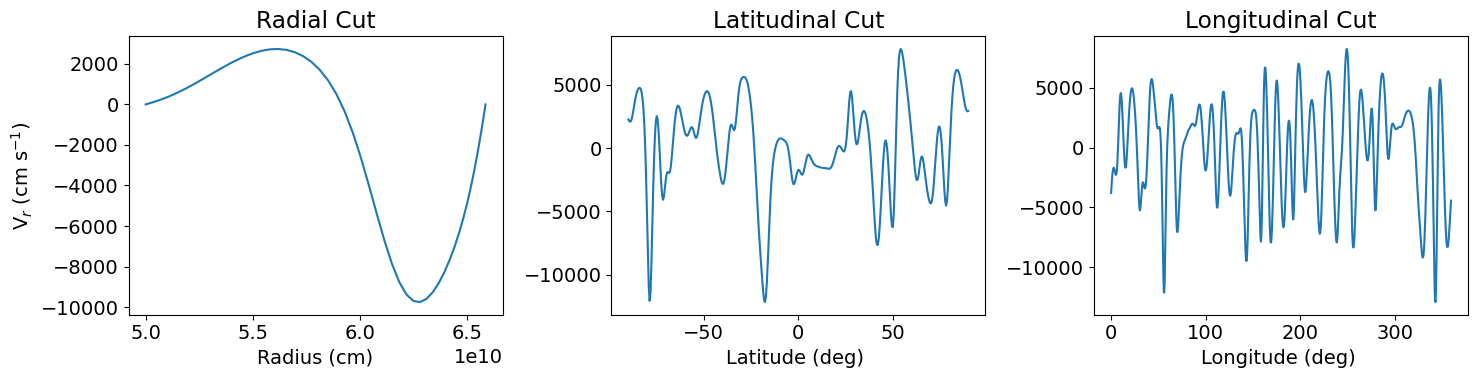

In [34]:
plt.rcParams.update({'font.size': font_size})
size_tuple = (15,4)
fig, ax = plt.subplots(ncols=3,figsize=size_tuple)
ax[0].plot(vr.r,radial_cut)
ax[0].set_title('Radial Cut')
ax[0].set_xlabel('Radius '+dunits)
ax[0].set_ylabel(r'V$_r$ '+vunits)

ax[1].plot(latitude,theta_cut)
ax[1].set_title('Latitudinal Cut')
ax[1].set_xlabel('Latitude (deg) ')

ax[2].plot(longitude,phi_cut)
ax[2].set_title('Longitudinal Cut')
ax[2].set_xlabel('Longitude (deg) ')

plt.tight_layout()

Excercise
--------

Now that you have seen how to manipulate the data in a Spherical_3D file try creating a 3-panel image showing

1. A spherical cut at constant radius
2. An equatorial cut at theta = $\pi/2$
3. A meridional cut at constant $\phi$

You should be able to do this relatively easily by grabbing the relevant code snippets from Shell_Slices.ipynb, Equatorial_Slices.ipynb and Meridional_Slices.ipynb.   Note that the latitudinal grid is symmetric about the equator, and so you will need to average over points $N_\theta/2-1$ and $N_\theta/2$ in order to build a "true" equatorial slice.